# Retrieval Systems with Adaptive Okapi BM25 and Boolean Search

## AmirAli Amini - 610399102

#### HW4


# در این تمرین این دو هر دو قسمت اپشنال هم زدم که یکی استفاده از هیپ هست برای برگردوندن رنگ های برتر و دیگری عوض کردن حالت اوکاپی به صورت اتوماتیک 

برای اوکا پی داخل توابع کویری و 
getTopK
هست که متد و اوکاپی متد میگیرن و اگه اوکاپی متد بهشون داده نشه به صورت اتوماتیک بر اساس طول کویری ورودی انتخاب میکنن که از کدوم حالت استفاده کنن

# گزارش

نمودارهای  پریسژن ریکال اخر فایل هست و همونجا تحلیلشون کردم
همچنین داخل کد کامنت گذاشتم که توابع رو توضیح میدم و میگم که هرکدوم چه چیزایی میگیرن چی برمیگردونن و چیکار میکنن

تو این سوال چنتا پارامتر داریم که دلیل انتخابشون رو میگم :‌

اولیش لامدا هست که دلیل اینکه نه دهم گذاشتم اینه که اگه مقدار کوچکی قرار میدادم تاثیر رلونت بودن داکیومنت و کویری کمتر میشد که به نظرم کار اشتباهیه چون هدف پیدا کردن داکیومنت ها رلونت به کویری هست

دومیش کا یک کا سه و بی هستن که مقادیرشون رو از اسلاید ها نوشتم و داخل اسلاید نوشته که این مقادیر نتایچ خوبی میدن




برای اسموس کردن هم از 
Jelinek-Mercer smoothing
استفاده کردم چون هم راحت تر بود هم یکم که سرچ کردم دیدم نتایج نهایی زیاد تفاوت نمیکنن 

## کتابخانه ها 

###  from nltk import word_tokenize :
از این کتابخانه برای تکنایز کردن داده ها به این دلیل که توکنایز کردن دیتا سریع تر میشه استفاده کردم

###  from nltk.corpus import stopwords :
از این کتابخانه برای دریافت استاپینگ ورد های زبان انگلیسی استفاده کردم

###  import string:
از این کتابخانه برای دریافت پانچویشن های زبان انگلیسی استفاده کردم

###  import numpy as np:
از این کتابخانه برای جمع یک عدد با تمام اعضای یک آرایه استفاده کردم

###  import copy:
از این کتابخانه برای دیپ کپی کردن ارایه استفاده کردم

In [1]:
from nltk.tokenize import word_tokenize


from nltk.corpus import stopwords # a library to tokenize input texts

import nltk


nltk.download('punkt')
nltk.download('stopwords') # stopping word in English language

import string # using to remove punctuation

import numpy as np

from heapq import heappop, heappush, heapify

import copy

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/amirali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Document Ranking – Space Vector Model

In [2]:

class searchEngine:
    def __init__(self , k1=1.5 , k3 = 1.5 ,b=0.75 , Lambda=0.9) -> None: # constructor of class
        # Constructor for the searchEngine class.
        # Initializes parameters and attributes.

        # Parameters:
        # - k1, k3, b, Lambda: Parameters for ranking models (Okapi BM25, Jelinek-Mercer)

        # Initialization of class attributes
        self.k1 = k1
        self.k3 = k3
        self.b = b
        self.Lambda=Lambda
        self.avrLen =0
        self.postingList =[]
        self.files=[] 
        self.numberOfDocuments = 0
        self.tfIdfMatrix = []
        self.tfIdfMatrixPM = []
        self.tfIdfMatrixPMLong = []
        self.LMMatrix = []
        self.totalWords = 0
        self.data = []

        # Stopwords set to ignore common words in English
        self.stop = set(stopwords.words('english') + list(string.punctuation)) # all extra expression which should ignore

        # structure of postingList : list of {word : nameOfWord , docs :[list of {doc:nameOfDocument , indexes: indexes of the word if this document}]}


    # binary search to find a word in posting list
    def searchPostingList(self, word):

        # Binary search to find a word in the posting list.

        # Parameters:
        # - word: The word to search for in the posting list.

        # Returns:
        # - Index of the word in the posting list.

        s= 0 
        e = len(self.postingList)
        if e <=0 :
            return 0
        e-=1
        while (1):
            if (e-s < 2):
                if (self.postingList[e]["word"] < word):
                    return e+1
                if (self.postingList[e]["word"] == word):
                    return e
                if (self.postingList[s]["word"] >= word):
                    return s

                return e
            mid = (s+e)/2
            mid = int(mid)
            if (word<self.postingList[mid]["word"]):
                e=mid
            elif (word> self.postingList[mid]["word"]):
                s = mid
            else :
                return mid
            
        # {word:str, indexes:list(int)}
    # binary search to find a word in each dictionary



    def addToPostingList(self, tokenizedText: list[str],docIndex:int , title:str = "title" , author:str = "author" ,B:str = "B"): # add tokenized word in posting list 

        # Add tokenized words to the posting list.

        # Parameters:
        # - tokenizedText: List of tokenized words in a document.
        # - docIndex: Index of the document.
        # - title, author, B: Metadata of the document.

        # Returns:
        # None
        for i in range(len(tokenizedText)):
            self.totalWords+=1
            word = tokenizedText[i]
            index = self.searchPostingList(word) # find index of word in posting list
            if (len(self.postingList)>index): # check if index is not larger than posting list (if word is bigger that all words, search function returns len(postingList)+1)
                if (self.postingList[index]["word"] == word): # check if index is the index of the word
                    if (self.postingList[index]["docs"][-1]["doc"] == docIndex): # if we have already added the document index 
                        self.postingList[index]["docs"][-1]["indexes"].append(i) # as we read tokens in order of their index, we need to add token in end of the list
                        self.postingList[index]["docs"][-1]["tf"]+=1
                        self.postingList[index]["cf"]+=1


                    else:
                        self.postingList[index]["docs"].append({"doc":docIndex,"indexes":[i], "tf":1 , "title":title , "author":author,"B":B }) # if we have not already added the document and dou to the fact that they are read in order of their index, we can easily add append new one in end of the list 
                        self.postingList[index]["df"]+=1
                        self.postingList[index]["cf"]+=1
                        

                else :
                    self.postingList[index:index]= [({"word":word ,"df":1 ,"cf":1 , "docs":[{"doc":docIndex,"indexes":[i], "tf":1 , "title":title , "author":author,"B":B }]})] # word is bigger that all other words => we can append it to end of the list
                                                    
            else :
                self.postingList.append({"word":word ,"df":1 ,"cf":1 , "docs":[{"doc":docIndex,"indexes":[i], "tf":1 , "title":title , "author":author,"B":B }]}) # we have not already added the word and dou to the fact that they are read in order of their index, we can easily add append new one in end of the list


    # Process an article and extract title, author, and body
    def process(self,article):

        # Process an article and extract title, author, and body.

        # Parameters:
        # - article: The raw text of an article.

        # Returns:
        # Dictionary with title ('T'), author ('A'), body ('B'), and words ('W').
         

        article = article.split('\n.T\n')[1]
        T, _, article = article.partition('\n.A\n')
        A, _, article = article.partition('\n.B\n')
        B, _, W = article.partition('\n.W\n')
        # print({'T':T, 'A':A, 'B':B, 'W':W})
        # input()
        return {'T':T, 'A':A, 'B':B, 'W':W}

    def input (self, filePath: list[str] , limit = -1): # input paths of inputs

        # Input method to read documents from specified file paths.

        # Parameters:
        # - filePath: List of file paths.
        # - limit: Limit the number of documents to read (default: -1 means read all).

        # Returns:
        # None


        totalLen = 0
        with open(filePath) as f:
            articles = f.read().split('\n.I')
            data = [self.process(article) for i,article in enumerate(articles)]
            self.data = data
            self.numberOfDocuments = len(data)
            for i in range(len(data)) :
                if (i == limit ):break
                file = data[i]
                text = file["W"] # read the file
                # tokenize text and ignore stopping words using nltk library 
                tokenizedText = [word for word in word_tokenize(text.lower(),preserve_line=False) if word not in self.stop] 
                print (f'document {i+1} : {file["T"]}')
                file["L" ] = len(tokenizedText)
                totalLen+=file["L"]
                # print(tokenizedText)
                self.addToPostingList(tokenizedText , i+1,file["T"] , file["A"], file["B"]) # i indicates to index of document we are reading
        self.avrLen = totalLen/self.numberOfDocuments

    def getQueryVector (self, q ):

        # Get vector representation for a given query.

        # Parameters:
        # - q: Query string.

        # Returns:
        # Numpy array representing the query vector.

        vector = np.array([0]*len(self.postingList))
        for termIndx in range(len(self.postingList)):
            vector[termIndx] = self.postingList[termIndx]["idf"] * q.split().count(self.postingList[termIndx]["word"])
        return vector
    
    def getTopK(self, q, k=10 , method = "default",okapiMethod = "default" , noPrint  = False):


        # Get top-k documents for a given query using TF-IDF or Okapi BM25.

        # Parameters:
        # - q: Query string.
        # - k: Number of documents to retrieve (default: 10).
        # - method: Ranking method ("default", "okapi").
        # - okapiMethod: Okapi BM25 method ("default", "long").

        # Returns:
        # List of top-k documents with scores.


        k1,k3,b = self.k1 , self.k3 , self.b
        result = []
        if method == "okapi":
            qSplit = q.split()
            normalizedQuery  = []
            PMFlag =  len(q.split())>10 
            if okapiMethod !="default":
                PMFlag = method == "long"
            noPrint or print(f"========================================== automatically changed to Okapi {'long'if PMFlag else 'basic'} ====================================")
            for token in qSplit :
                tokenIndex =self.searchPostingList(token)
                if self.postingList[tokenIndex]["word"]  == token:
                    normalizedQuery.append(tokenIndex)

            for doc in range(self.numberOfDocuments):
                tempScore = 0
                for tokenIndex in normalizedQuery:
                    tempScore+= self.tfIdfMatrixPMLong[tokenIndex][doc] if  PMFlag else self.tfIdfMatrixPM[tokenIndex][doc]

                result.append([-1*tempScore , doc])
        else :
            queryVector = self.getQueryVector(q) 
            # print ("query vector sum " , (queryVector.sum()))
            for doc in range(self.numberOfDocuments):
                result.append([-np.inner(queryVector, self.tfIdfMatrix[:,doc]) , doc ]) # multiply elements to -1 to make it max heap
        ans = []
        heapify(result)
        for _ in range(k):
            ans.append(heappop(result))
        return [[-i[0] , i[1]+1]   for i in ans]  # multiply elements to -1 to get original value

    def query (self, q ,printDetails=False , k=10,method = "default" , okapiMethod = "default"):


        #  Execute a query and return the results.

        # Parameters:
        # - q: Query string.
        # - printDetails: Whether to print detailed results.
        # - k: Number of documents to retrieve (default: 10).
        # - method: Ranking method ("default", "okapi").
        # - okapiMethod: Okapi BM25 method ("default", "long").

        # Returns:
        # List of documents with relevant information.
        
        tops = self.getTopK(q , k , method=method , okapiMethod=okapiMethod)
        printDetails and print("\n".join(map(str,tops)))
        ans = []
        i=1
        for item in tops :
            temp = copy.deepcopy(self.data[item[1]])
            temp["doc" ]= item[1]
            temp["score" ]= item[0]
            temp["rank" ]= i
            i+=1

            ans.append(temp)
        return  ans 
    

    def build (self):

        # Build the index.

        # Parameters:
        # None

        # Returns:
        # None

        self.makeIDF()
        self.makeTfIdfMatrix()
        self.makeLMMatrix()

    def makeIDF (self):

        # Calculate IDF for terms in the posting list.

        # Parameters:
        # None

        # Returns:
        # None

        for item in self.postingList:
            item["idf"] = np.log(self.numberOfDocuments/item["df"])


    def makeTfIdfMatrix(self): # create to matrix tfIdf and tdIdfPm

        #  Calculate TF-IDF matrices for documents.

        # Parameters:
        # None

        # Returns:
        # None

        k1,k3,b = self.k1 , self.k3 , self.b
        self.tfIdfMatrix =  [[0]*self.numberOfDocuments for _ in range(len(self.postingList))]
        self.tfIdfMatrixPM =  [[0]*self.numberOfDocuments for _ in range(len(self.postingList))]
        self.tfIdfMatrixPMLong =  [[0]*self.numberOfDocuments for _ in range(len(self.postingList))]
        for indx in range(len(self.postingList)):
            item = self.postingList[indx]
            idf = item["idf"]
            docs = item["docs"]
            for doc in docs:
                self.tfIdfMatrix[indx][doc["doc"]-1]=doc["tf"] * idf
                
                self.tfIdfMatrixPM[indx][doc["doc"]-1]= idf * doc["tf"]  * (((k1+1))/ (k1*((1-b) +b *(self.data[doc["doc"]-1]["L"] /self.avrLen ))+doc["tf"]))

                self.tfIdfMatrixPMLong[indx][doc["doc"]-1]= idf * doc["tf"]  * (((k1+1))/ (k1*((1-b) +b *(self.data[doc["doc"]-1]["L"] /self.avrLen ))+doc["tf"]))* ((k3+1)*doc["tf"]) / ((k3)+doc["tf"])


        self.tfIdfMatrix = np.array(self.tfIdfMatrix ,dtype=float)
        self.tfIdfMatrixPM = np.array(self.tfIdfMatrixPM ,dtype=float)
        self.tfIdfMatrixPMLong = np.array(self.tfIdfMatrixPMLong ,dtype=float)

        
        for doc in range(self.numberOfDocuments):
            norm =  np.linalg.norm(self.tfIdfMatrix[:,doc])
            if norm :self.tfIdfMatrix[:,doc] = self.tfIdfMatrix[:,doc]/norm

            # normPm =  np.linalg.norm(self.tfIdfMatrixPM[:,doc])
            # if normPm :self.tfIdfMatrixPM[:,doc] = self.tfIdfMatrixPM[:,doc]/normPm 

            # normPmLong =  np.linalg.norm(self.tfIdfMatrixPMLong[:,doc])
            # if normPmLong :self.tfIdfMatrixPMLong[:,doc] = self.tfIdfMatrixPMLong[:,doc]/normPmLong 


    def makeLMMatrix(self): # create to matrix tfIdf and tdIdfPm

        #  Calculate language modeling matrices.

        # Parameters:
        # None

        # Returns:
        # None

        self.LMMatrix =  [[0]*self.numberOfDocuments for _ in range(len(self.postingList))]
        for indx in range(len(self.postingList)):
            item = self.postingList[indx]
            docs = item["docs"]
            smoothValue =item["cf"]/self.totalWords 
            i = 0
            for doc in docs:
                P=doc["tf"]/self.data[doc["doc"]-1]["L"]
                self.LMMatrix[indx][doc["doc"]-1]= P 
                
                while (i < doc["doc"]-1):
                    self.LMMatrix[indx][i]=(1-self.Lambda) * smoothValue
                    i+=1
                i = doc["doc"]
            
            while (i < self.numberOfDocuments):
                self.LMMatrix[indx][i]=(1-self.Lambda) * smoothValue
                i+=1
        self.LMMatrix = np.array(self.LMMatrix ,dtype=float)
            

    
    def getTopKLM(self, q, k=10):

        # Get top-k documents for a given query using the language modeling approach.

        # Parameters:
        # - q: Query string.
        # - k: Number of documents to retrieve (default: 10).

        # Returns:
        # List of top-k documents with scores.

        result = []
        qSplit = q.split()
        normalizedQuery  = []
        for token in qSplit :
            tokenIndex =self.searchPostingList(token)
            if self.postingList[tokenIndex]["word"]  == token:
                normalizedQuery.append(tokenIndex)

        for doc in range(self.numberOfDocuments):
            tempScore = 1 
            for tokenIndex in normalizedQuery:
                tempScore*= self.LMMatrix[tokenIndex][doc]
            smoothValue =self.postingList[tokenIndex]["cf"]/self.totalWords * (1-self.Lambda)
            # print (f'smooth value :  {smoothValue}')
            result.append([-1*tempScore*smoothValue , doc])
        ans = []
        heapify(result)
        for _ in range(k):
            ans.append(heappop(result))
        return [[-i[0] , i[1]+1]   for i in ans]  # multiply elements to -1 to get original value

    
    def queryLM (self, q ,printDetails=False , k=10):

        #  Execute a language modeling query and return the results.

        # Parameters:
        # - q: Query string.
        # - printDetails: Whether to print detailed results.
        # - k: Number of documents to retrieve (default: 10).

        # Returns:
        # List of documents with relevant information.

        tops = self.getTopKLM(q , k)
        printDetails and print("\n".join(map(str,tops)))
        ans = []
        i=1
        for item in tops :
            temp = copy.deepcopy(self.data[item[1]])
            temp["doc" ]= item[1]
            temp["score" ]= item[0]
            temp["rank" ]= i
            i+=1

            ans.append(temp)
        return  ans 

            
        



    def prnt(self):
        for i in self.postingList:
            # print(i["word"])
            print (i)

    def prntTfIdfMatrix(self):
        for i in self.tfIdfMatrix:
            # print(i)
            for j in i :
                if (j):print (j)

    def prntLMMatrix(self):
        print (1/self.totalWords)

        print (np.min(self.LMMatrix))
        # for i in range(len(self.LMMatrix)):
        #     # print(i)
        #     for j in range(self.numberOfDocuments):
        #         self.LMMatrix[i][j] or print (i , j , self.LMMatrix[i][j])
    





In [3]:
test = searchEngine()
test.input('cran.all.1400')
# test.makeIDF()
test.build()



document 1 : experimental investigation of the aerodynamics of a
wing in a slipstream .
document 2 : simple shear flow past a flat plate in an incompressible fluid of small
viscosity .
document 3 : the boundary layer in simple shear flow past a flat plate .
document 4 : approximate solutions of the incompressible laminar
boundary layer equations for a plate in shear flow .
document 5 : one-dimensional transient heat conduction into a double-layer
slab subjected to a linear heat input for a small time
internal .
document 6 : one-dimensional transient heat flow in a multilayer
slab .
document 7 : the effect of controlled three-dimensional roughness
on boundary layer transition at supersonic speeds .
document 8 : measurements of the effect of two-dimensional and three-dimensional
roughness elements on boundary layer transition .
document 9 : transition studies and skin friction measurements on
an insulated flat plate at a mach number of 5.8 .
document 10 : the theory of the impact tube at

In [4]:
# test.makeTfIdfMatrix()


In [5]:
test.makeLMMatrix()


In [6]:
q="what design factors can be used to control lift-drag ratios at mach numbers above 5 ."

for doc in test.query(q , printDetails=True ) :#get top K and document names 
    print (f'{doc["rank"]}  : doc number {doc["doc"]} which title is : {doc["T"]}')

[3.1704417010497705, 1188]
[2.0973125194166395, 1380]
[1.6330357688862813, 638]
[1.5086510312409565, 368]
[1.3864407795051688, 1291]
[1.1697226135010963, 9]
[1.1526566952318045, 225]
[1.1524565092529633, 748]
[1.098755368739766, 77]
[1.0936848276423887, 1344]
1  : doc number 1188 which title is : nonequilibrium flow past a wedge .
2  : doc number 1380 which title is : effect of mach number on boundary layer transition
in the presence of pressure rise and surface roughness
on an ogive-cylinder body with cold wall conditions .
3  : doc number 638 which title is : analytical study of the tumbling motions of vehicles
entering planetary atmospheres .
4  : doc number 368 which title is : an approximate solution of the supersonic blunt body
problem for prescribed arbitrary axisymmetric shapes .
5  : doc number 1291 which title is : effect of jet pluming on the static stability of cone-cylinder-flare
configurations at a mach number of 9. 65 .
6  : doc number 9 which title is : the theory of th

In [7]:
q="what design factors can be used to control lift-drag ratios at mach numbers above 5 ."

for doc in test.query(q , printDetails=True , method="okapi",okapiMethod='basic' ) :#get top K and document names 
    print (f'{doc["rank"]}  : doc number {doc["doc"]} which title is : {doc["T"]}')

========================================== automatically changed to Okapi basic ====================================
[30.0706222324278, 1188]
[18.566808432924006, 1380]
[14.293888746469582, 748]
[14.060396038067685, 225]
[12.598421015587851, 638]
[12.497645757431727, 1291]
[12.062361952017039, 1345]
[11.887320535148964, 1349]
[11.495802478946423, 9]
[10.77109473325968, 340]
1  : doc number 1188 which title is : nonequilibrium flow past a wedge .
2  : doc number 1380 which title is : effect of mach number on boundary layer transition
in the presence of pressure rise and surface roughness
on an ogive-cylinder body with cold wall conditions .
3  : doc number 748 which title is : the aerodynamic effects of aspect ratio and sweepback
on wing flutter .
4  : doc number 225 which title is : aerofoil theory of a flat delta wing at supersonic
speeds .
5  : doc number 638 which title is : analytical study of the tumbling motions of vehicles
entering planetary atmospheres .
6  : doc number 1291 wh

In [8]:
q="what design factors can be used to control lift-drag ratios at mach numbers above 5 ."

for doc in test.query(q , printDetails=True , method="okapi" ) :#get top K and document names 
    print (f'{doc["rank"]}  : doc number {doc["doc"]} which title is : {doc["T"]}')

========================================== automatically changed to Okapi long ====================================
[47.18141351220237, 1188]
[28.15607952147938, 1380]
[24.6882781962146, 748]
[22.724366021728045, 638]
[22.153330961464388, 225]
[21.9795915924295, 1291]
[21.21228032217713, 9]
[19.240071398298756, 77]
[18.807403252167557, 368]
[17.661902553474565, 1349]
1  : doc number 1188 which title is : nonequilibrium flow past a wedge .
2  : doc number 1380 which title is : effect of mach number on boundary layer transition
in the presence of pressure rise and surface roughness
on an ogive-cylinder body with cold wall conditions .
3  : doc number 748 which title is : the aerodynamic effects of aspect ratio and sweepback
on wing flutter .
4  : doc number 638 which title is : analytical study of the tumbling motions of vehicles
entering planetary atmospheres .
5  : doc number 225 which title is : aerofoil theory of a flat delta wing at supersonic
speeds .
6  : doc number 1291 which tit

In [9]:
q="what design factors can be used to control lift-drag ratios at mach numbers above 5 ."

for doc in test.queryLM(q , printDetails=True) :#get top K and document names 
    print (f'{doc["rank"]}  : doc number {doc["doc"]} which title is : {doc["T"]}')

[1.5622824194782747e-22, 1188]
[2.1708886491786695e-29, 1380]
[2.9184392413033647e-31, 225]
[7.154823351534895e-32, 748]
[5.914649884028307e-32, 173]
[8.932170893088334e-33, 1349]
[6.98977363588969e-33, 423]
[6.934211706747604e-33, 338]
[6.717687597062205e-33, 746]
[6.585547028484568e-33, 9]
1  : doc number 1188 which title is : nonequilibrium flow past a wedge .
2  : doc number 1380 which title is : effect of mach number on boundary layer transition
in the presence of pressure rise and surface roughness
on an ogive-cylinder body with cold wall conditions .
3  : doc number 225 which title is : aerofoil theory of a flat delta wing at supersonic
speeds .
4  : doc number 748 which title is : the aerodynamic effects of aspect ratio and sweepback
on wing flutter .
5  : doc number 173 which title is : investigation at supersonic speeds of the effects of
jet mach number and divergence angle of the nozzle
upon the pressure of the base annulus of a body of
revolution .
6  : doc number 1349 whic

In [10]:
q="what similarity laws must be obeyed when constructing aeroelastic models of heated high speed aircraft ."


# Relevance Document and queries:

In [11]:
relevantDocuments = [[] for _ in range(230)]
with open("cranqrel.txt") as f:
    lines = f.readlines()
    for line in lines :
        s = list(map(int,line.split()))
        if s[2]>0:
            relevantDocuments[s[0]].append(s[1])
    relevantDocuments = relevantDocuments[1:]

print (relevantDocuments)
    

[[184, 29, 31, 12, 51, 102, 13, 14, 15, 57, 378, 859, 185, 30, 37, 52, 142, 195, 875, 56, 66, 95, 462, 497, 858, 876, 879, 880], [12, 15, 184, 858, 51, 102, 202, 14, 52, 380, 746, 859, 948, 285, 390, 391, 442, 497, 643, 856, 857, 877, 864, 658], [5, 6, 90, 91, 119, 144, 181, 399], [236, 166], [552, 401, 1297, 1296], [99, 115, 257, 258], [20, 56, 57, 58, 19], [48, 122, 20, 58, 196, 354, 360, 197, 999, 1112, 1005], [21, 22, 550], [259, 405, 302, 436, 437, 438, 998, 1011], [27, 28, 262, 160, 20, 263, 654], [86, 194, 650, 649, 652], [64, 265, 65, 311], [64, 65], [463, 462], [266, 106, 196], [106, 196], [196, 197, 198], [32, 67, 164, 639, 715, 716, 719, 1379, 717], [87, 88, 104, 267, 268, 269, 270, 407, 408], [271, 16, 413, 414], [68], [900, 902, 200, 201, 601, 899, 903, 593, 199, 594, 901, 544, 597, 749, 917, 919, 1333, 634, 687, 698, 1290, 700, 704, 705, 1109, 1112, 1141, 1197, 1256, 1259, 1272, 1289], [46, 47, 92], [213, 212, 214, 215, 216, 276, 277, 426, 427], [145, 611, 376, 406, 565, 

In [12]:
queries = []
with open("cran.qry") as f:
        articles = f.read().split('\n.I')
        queries = [" ".join(article.split('\n')[2:]) for article in articles]


In [13]:
def getRP(result , relevantList ):
    numberOfRelevantItems=0
    relevantItems = []
    ids = [item[1] for item in result]
    n = len(ids)
    for id in ids:
        if id in relevantList:
            numberOfRelevantItems +=1
            relevantItems.append(id)
    result = [0]*11
    if numberOfRelevantItems==0:return result
    relevantDic = {"P" :[], "R":[]}
    relevantSeen = 0
    for idIndx in range(n):
        if ids[idIndx] in relevantItems:
            relevantSeen+=1
        relevantDic["P"].append(relevantSeen/(idIndx+1))
        relevantDic["R"].append(relevantSeen/(numberOfRelevantItems or 1))

    for i in range (n-1 , -1 ,-1):
        value = 0
        while (value <= relevantDic["R"][i]*10):
            if (result[value] < relevantDic["P"][i]):
                result[value] = relevantDic["P"][i]
            else :break
            value+=1
    # print (relevantDic)
    return np.array(result,dtype=float)
    

In [14]:
getRP(test.getTopK(queries[1]) , relevantDocuments[1])

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.57142857, 0.57142857,
       0.57142857])

In [15]:
tfIdf = []
okapiBasic = []
okapiLong = []
LanguageModel = []
for queryIndx in range(5):
    tfIdf.append(getRP( test.getTopK(queries[queryIndx] , method="tfIdf", noPrint=True), relevantDocuments[queryIndx]))
    okapiBasic.append(getRP( test.getTopK(queries[queryIndx] , method="okapi" , okapiMethod="basic", noPrint=True), relevantDocuments[queryIndx]))
    okapiLong.append(getRP(test.getTopK(queries[queryIndx] , method="okapi" , okapiMethod="long", noPrint=True), relevantDocuments[queryIndx]))
    LanguageModel.append(getRP(test.getTopKLM(queries[queryIndx] ), relevantDocuments[queryIndx]))


tfIdf  = np.array(tfIdf )
okapiBasic  = np.array(okapiBasic )
okapiLong  = np.array(okapiLong )
LanguageModel  = np.array(LanguageModel )

tfIdfAvg = tfIdf.sum(axis=0) / len (tfIdf ) 
okapiBasicAvg = okapiBasic.sum(axis=0) / len (okapiBasic ) 
okapiLongAvg = okapiLong.sum(axis=0) / len (okapiLong ) 
LanguageModelAvg = LanguageModel.sum(axis=0) / len (LanguageModel ) 

# 5 queries

در حالتی که پنج تا کویری تست گرفتم تی اف ای دی اف و لنگویج مدل بهترین ضعیف تری رو داشتن و اوکاپی تو دو حالتش نتیجش بهتر از این دوتاس

تو این تست بهترین مقدار تکی در نمودار مال 
tfidf 
هست و بعد اون اوکاپی ها و در اخر هم لنگویح مدل


سعی میکنم فارسی بنویسم همه چیو چون انگلیسی قاطی کنم بهم میریزه متن هام

### 11-point interpolated average precision for tfIdf

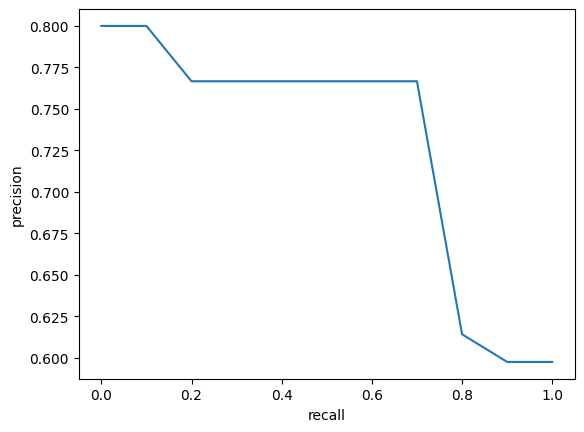

In [16]:
plt.plot([i/10 for i in range(11)] , tfIdfAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for okapiBasicAvg

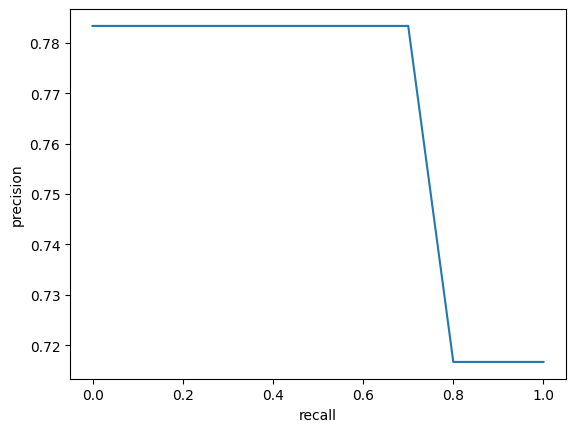

In [17]:
plt.plot([i/10 for i in range(11)] , okapiBasicAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for okapiLongAvg

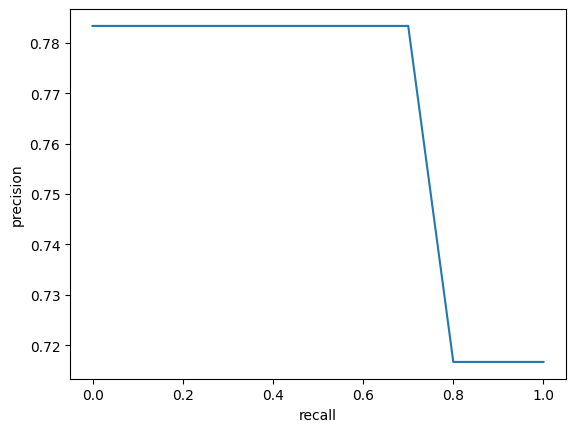

In [18]:
plt.plot([i/10 for i in range(11)] , okapiLongAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for LanguageModelAvg

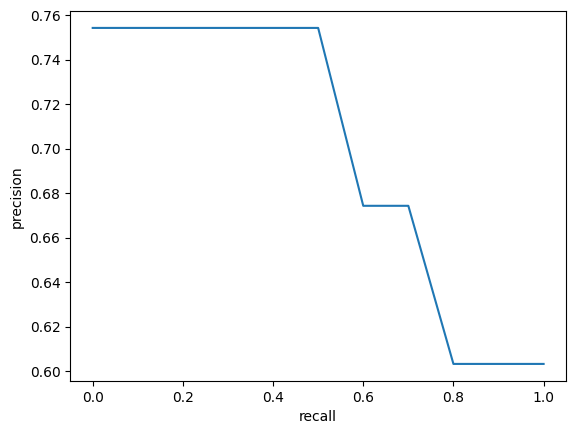

In [19]:
plt.plot([i/10 for i in range(11)] , LanguageModelAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

# 50 queries 

در حالتی که پنجاه تا کویری رو تست کردم تایج یکم بهم نزدیک شدن ولی هنوزم نتایج او کا پی ها بهتر هست در حالت کلیشون 


تو این تست و با تعداد کویری بیشتر نتیجه فرق کرد و اوکاپی ها تو تک مقدار هم نتیجه بهتری دارن و در کل هم همنطور


In [20]:
tfIdf = []
okapiBasic = []
okapiLong = []
LanguageModel = []
for queryIndx in range(50):
    tfIdf.append(getRP( test.getTopK(queries[queryIndx] , method="tfIdf", noPrint=True), relevantDocuments[queryIndx]))
    okapiBasic.append(getRP( test.getTopK(queries[queryIndx] , method="okapi" , okapiMethod="basic", noPrint=True), relevantDocuments[queryIndx]))
    okapiLong.append(getRP(test.getTopK(queries[queryIndx] , method="okapi" , okapiMethod="long", noPrint=True), relevantDocuments[queryIndx]))
    LanguageModel.append(getRP(test.getTopKLM(queries[queryIndx] ), relevantDocuments[queryIndx]))


tfIdf  = np.array(tfIdf )
okapiBasic  = np.array(okapiBasic )
okapiLong  = np.array(okapiLong )
LanguageModel  = np.array(LanguageModel )

tfIdfAvg = tfIdf.sum(axis=0) / len (tfIdf ) 
okapiBasicAvg = okapiBasic.sum(axis=0) / len (okapiBasic ) 
okapiLongAvg = okapiLong.sum(axis=0) / len (okapiLong ) 
LanguageModelAvg = LanguageModel.sum(axis=0) / len (LanguageModel ) 

### 11-point interpolated average precision for tfIdf

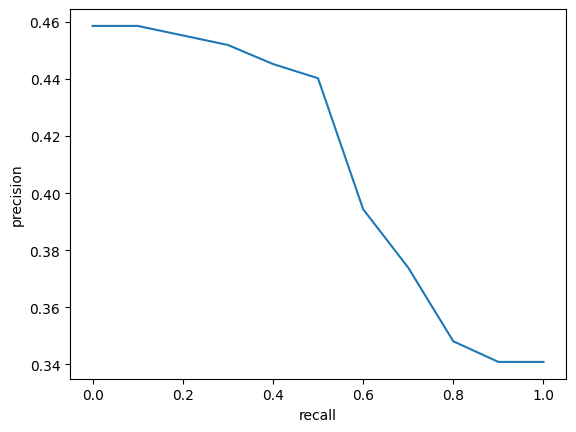

In [21]:
plt.plot([i/10 for i in range(11)] , tfIdfAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for okapiBasicAvg

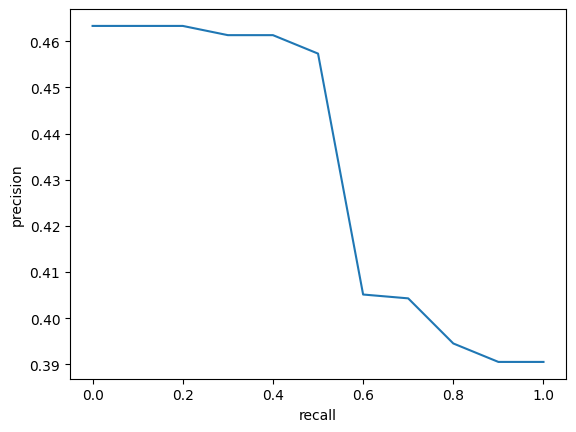

In [22]:
plt.plot([i/10 for i in range(11)] , okapiBasicAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for okapiLongAvg

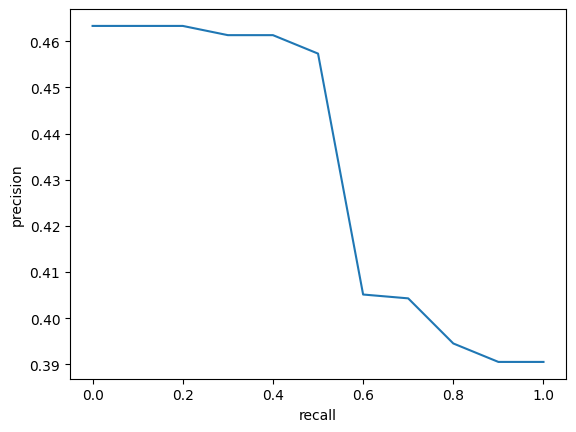

In [23]:
plt.plot([i/10 for i in range(11)] , okapiLongAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

# 11-point interpolated average precision for LanguageModelAvg

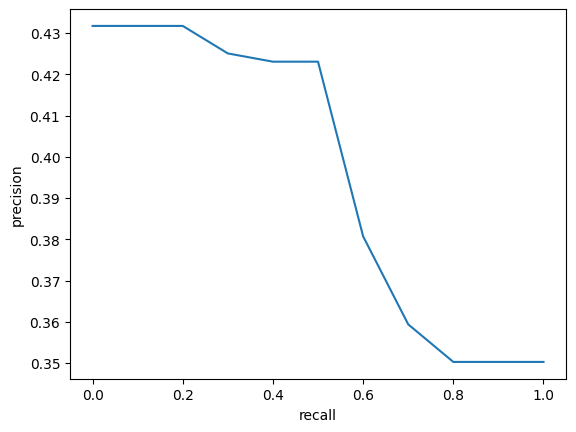

In [24]:
plt.plot([i/10 for i in range(11)] , LanguageModelAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

# 225 queries 

In [25]:
tfIdf = []
okapiBasic = []
okapiLong = []
LanguageModel = []
for queryIndx in range(225):
    tfIdf.append(getRP( test.getTopK(queries[queryIndx] , method="tfIdf", noPrint=True), relevantDocuments[queryIndx]))
    okapiBasic.append(getRP( test.getTopK(queries[queryIndx] , method="okapi" , okapiMethod="basic", noPrint=True), relevantDocuments[queryIndx]))
    okapiLong.append(getRP(test.getTopK(queries[queryIndx] , method="okapi" , okapiMethod="long", noPrint=True), relevantDocuments[queryIndx]))
    LanguageModel.append(getRP(test.getTopKLM(queries[queryIndx] ), relevantDocuments[queryIndx]))


tfIdf  = np.array(tfIdf )
okapiBasic  = np.array(okapiBasic )
okapiLong  = np.array(okapiLong )
LanguageModel  = np.array(LanguageModel )

tfIdfAvg = tfIdf.sum(axis=0) / len (tfIdf ) 
okapiBasicAvg = okapiBasic.sum(axis=0) / len (okapiBasic ) 
okapiLongAvg = okapiLong.sum(axis=0) / len (okapiLong ) 
LanguageModelAvg = LanguageModel.sum(axis=0) / len (LanguageModel ) 

### 11-point interpolated average precision for tfIdfAvg

در این حالت که تعداد کویری ها خیلی زیاد شدن نتیجه کلا تغییر کرده و 
tfIdf
ضعیف ترین نتیجه رو داشته

اوکاپی ها هنوزم هم نتیجه کلی و هم نتیجه تکیشون از همه بهتره و لنگویج مدل در جایگاه سوم قرار گرفته

در کل شکل نمودار ها خیلی بهم نزدیک و شبیه شدن و این خیلی حالب بود



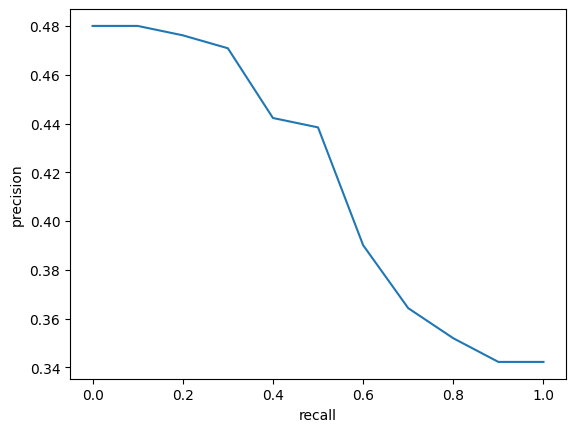

In [26]:
plt.plot([i/10 for i in range(11)] , tfIdfAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for okapiBasicAvg

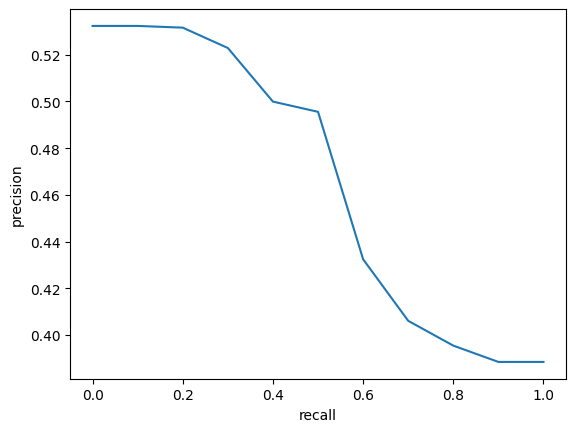

In [27]:
plt.plot([i/10 for i in range(11)] , okapiBasicAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for okapiLongAvg

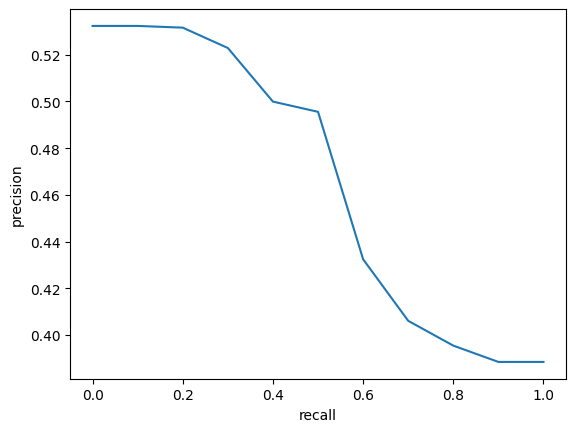

In [28]:
plt.plot([i/10 for i in range(11)] , okapiLongAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

### 11-point interpolated average precision for LanguageModelAvg

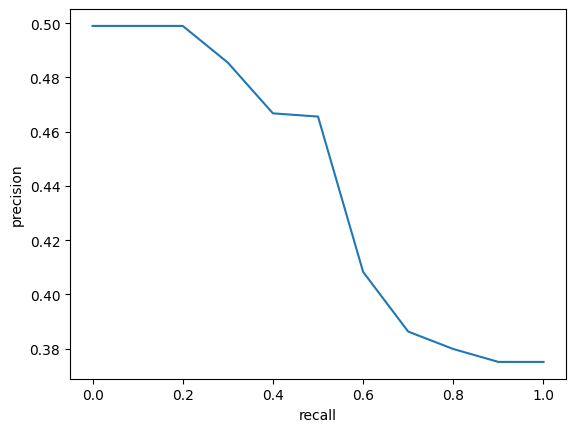

In [29]:
plt.plot([i/10 for i in range(11)] , LanguageModelAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

# نتیجه گیری کلی
### نتایج جزئی تر بالا تر هستن میتونید ببینید

در کل با زیاد شدن تعداد کویری ها نتایج یکم تغییر کرد و در نهایت او کا پی ها بهترین نتیجه رو داشتن 

در ابتدا فکر میکردم که لنگویج مدل باید بهترین جواب رو بده ولی در نهایت دیدم که اینطور نیست


# K = 100 , number of queries = 225

در این جالت هم اومدم کا رو زیاد کردم ببینم چقد تفاوت میکنه و دیدم با کا بیشتر هم نتایج تغییر زیادی نکردن و به همون نتایج قبلی میرسیم


In [30]:
tfIdf = []
okapiBasic = []
okapiLong = []
LanguageModel = []
for queryIndx in range(225):
    tfIdf.append(getRP( test.getTopK(queries[queryIndx] , k=100 , method="tfIdf", noPrint=True), relevantDocuments[queryIndx]))
    okapiBasic.append(getRP( test.getTopK(queries[queryIndx] , k=100 , method="okapi" , okapiMethod="basic", noPrint=True), relevantDocuments[queryIndx]))
    okapiLong.append(getRP(test.getTopK(queries[queryIndx] , k=100 , method="okapi" , okapiMethod="long", noPrint=True), relevantDocuments[queryIndx]))
    LanguageModel.append(getRP(test.getTopKLM(queries[queryIndx] , k=100 ), relevantDocuments[queryIndx]))


tfIdf  = np.array(tfIdf )
okapiBasic  = np.array(okapiBasic )
okapiLong  = np.array(okapiLong )
LanguageModel  = np.array(LanguageModel )

tfIdfAvg = tfIdf.sum(axis=0) / len (tfIdf ) 
okapiBasicAvg = okapiBasic.sum(axis=0) / len (okapiBasic ) 
okapiLongAvg = okapiLong.sum(axis=0) / len (okapiLong ) 
LanguageModelAvg = LanguageModel.sum(axis=0) / len (LanguageModel ) 

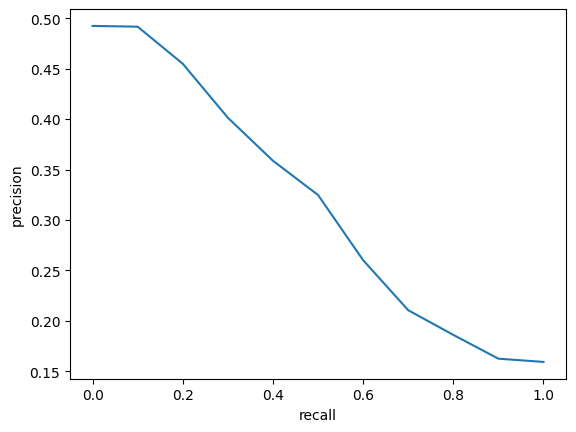

In [31]:
plt.plot([i/10 for i in range(11)] , tfIdfAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

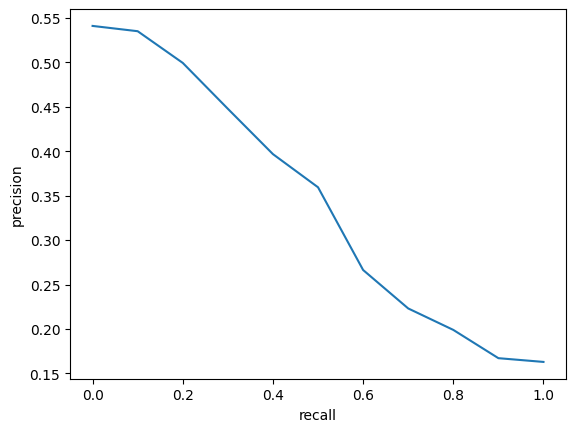

In [32]:
plt.plot([i/10 for i in range(11)] , okapiBasicAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

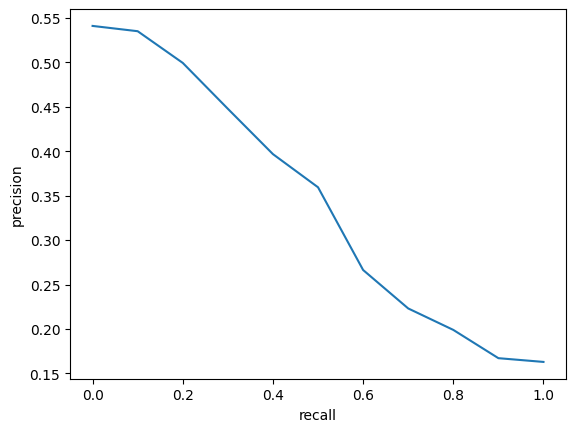

In [33]:
plt.plot([i/10 for i in range(11)] , okapiLongAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()

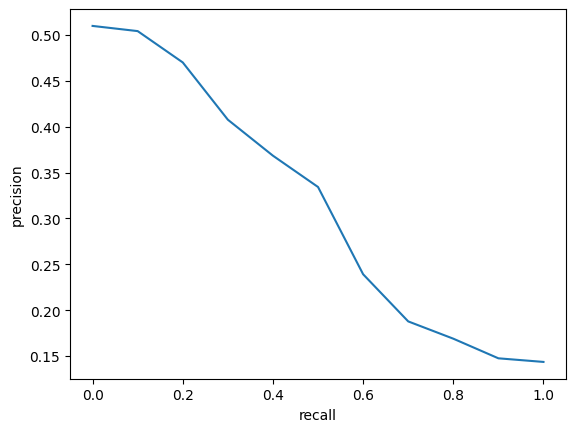

In [34]:
plt.plot([i/10 for i in range(11)] , LanguageModelAvg)
plt.xlabel( "recall")
plt.ylabel("precision")
plt.show()